# About assignment

The students will use the Auto+MPG dataset available from the UCI Machine Learning Repository
(https://archive.ics.uci.edu/ml/datasets/Auto+MPG). This dataset summarizes 8 features about cars. Based on
this set of 60 attributes, the main goal is trying to predict their fuel consumption.

**Pre‐processing & Descriptive Analysis:** Data should be prepared (cleaning the data) for ulterior analysis as well
as descriptive statistics should be extracted (i) to provide basic information about variables in the dataset and (ii) to
highlight potential relationships between variables. For that descriptive process, students should use tabular and/or
graphical layouts to provide measures about the centrality and variability of the data and measures of relationship
between variables.

**Prediction:** Applying regression. According to the main goal of the dataset, regression techniques should be
applied to predict the fuel consumption of the cars. Students are expected to identify those variables with highest
influence and infer the relationship between these dependent variables and the required data. Finally, the
prediction should be assessed in quality terms.

# About AUTO + MGP dataset

**This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.The dataset was used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993**

**Past Usage:**
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

**Relevant Information:** 
- This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute.  The original dataset is available in the file "auto-mpg.data-original". 

- "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Number of Instances:** 398

**Number of Attributes:** 9 including the class attribute

**Attribute Information:**
1. mpg :                             continuous
2. cylinders:                        multi-valued discrete
3. displacement:                     continuous
4. horsepower:                       continuous
5. weight:                           continuous
6. acceleration:                     continuous
7. model year:                       multi-valued discrete
8. origin:                           multi-valued discrete
9. car name:                         string (unique for each instance)

**Missing Attribute Values**:  horsepower has 6 missing values

**Notes about attributes:**
- MGP: miles per gallon.


- Displacement: Engine displacement (cu. inches) -> Engine displacement is the combined swept volume of the pistons inside the cylinders of an engine. It is calculated from the bore (diameter of the cylinders), stroke (distance the piston travels), and number of cylinders. Displacement is an important factor, as it has a direct impact on an engine’s power output, fuel efficiency, and in some countries, how a vehicle is taxed. The pistons inside an engine move in a reciprocating motion, that is, up and down within the cylinder, as the crankshaft rotates. The volume inside one cylinder changes as the piston moves through the combustion cycle. Simultaneously, the other cylinders change volume as their pistons move through other phases of the combustion cycle. So while volume of individual cylinders change as they reciprocate, total engine volume remains constant.


- Acceleration: the acceleration of cars in the United States is stated as a "zero to sixty" time, where vi is zero and vf is 60 miles per hour or 27 meters per second.


- Model year: model year (modulo 100), in the twentieth century.


- Origin: origin of car (1. American, 2. European, 3. Japanese).

# Import libraries

In [16]:
library(ggplot2)
library(corrplot)
library(dplyr)
options(warn=0, repr.plot.width=5, repr.plot.height=5) ## Disable warnings, set size of plots.

# Import  dataset from UCI Machine Learning Repository

In [2]:
auto_mgp <- read.table(file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')

In [3]:
names(auto_mgp) <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", 
                     "origin", "car name")

------------------------------------------------------------------------------------------------------------------

# Pre-processing & Descriptive Analysis

In [4]:
head(auto_mgp)

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [5]:
nrow(auto_mgp)

[1] 398

In [6]:
ncol(auto_mgp)

[1] 9

In [7]:
summary(auto_mgp)

      mpg          cylinders      displacement     horsepower      weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   150.0  : 22   Min.   :1613  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:104.2   90.00  : 20   1st Qu.:2224  
 Median :23.00   Median :4.000   Median :148.5   88.00  : 19   Median :2804  
 Mean   :23.51   Mean   :5.455   Mean   :193.4   110.0  : 18   Mean   :2970  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:262.0   100.0  : 17   3rd Qu.:3608  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   75.00  : 14   Max.   :5140  
                                                 (Other):288                 
  acceleration     model_year        origin                car name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   ford pinto    :  6  
 1st Qu.:13.82   1st Qu.:73.00   1st Qu.:1.000   amc matador   :  5  
 Median :15.50   Median :76.00   Median :1.000   ford maverick :  5  
 Mean   :15.57   Mean   :76.01   Mean   :1.573   toyota corolla:  5  
 3rd Qu.:17.18   3rd Qu.:7

In [8]:
str(auto_mgp)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?","100.0","102.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


------------------------------------------------------------------------------------------------------------------
**Note**: As we can see, summary indicates no missing data. However we can check with str (structure of an R object) that _horsepower_ attribute is a factor with 94 levels whose one of the level is "?", this is really a missing data, so we are going to remove this rows from our dataset and convert _horsepower_ attribute to an integer.

In [9]:
## Delete rows with a horsepower column equal to "?"
auto_mgp <- auto_mgp[-which(auto_mgp$horsepower=="?"),]

## Convert horsepower column from factor to integer
auto_mgp$horsepower <- as.integer(auto_mgp$horsepower)

In [10]:
head(auto_mgp)

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
18,8,307,17,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,35,3693,11.5,70,1,buick skylark 320
18,8,318,29,3436,11.0,70,1,plymouth satellite
16,8,304,29,3433,12.0,70,1,amc rebel sst
17,8,302,24,3449,10.5,70,1,ford torino
15,8,429,42,4341,10.0,70,1,ford galaxie 500


In [11]:
nrow(auto_mgp)

[1] 392

In [12]:
ncol(auto_mgp)

[1] 9

In [13]:
summary(auto_mgp)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 2.00   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.:26.75   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median :62.00   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :52.16   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:80.00   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :94.00   Max.   :5140  
                                                                               
  acceleration     model_year        origin                    car name  
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [14]:
str(auto_mgp)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


## Exploring data

### Histograms

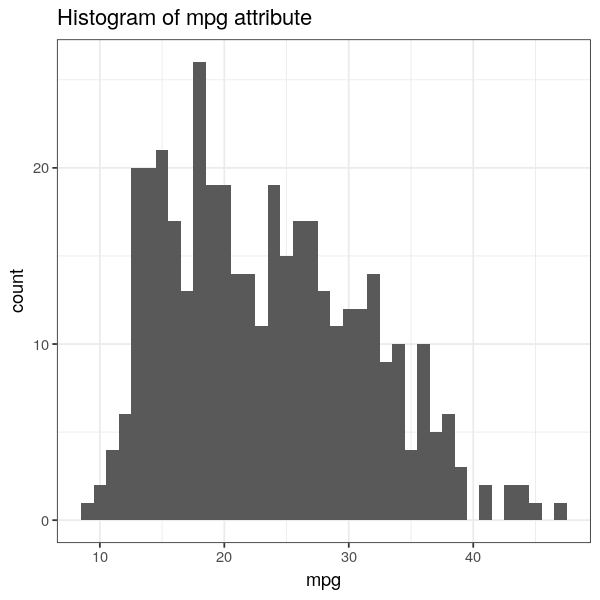

In [30]:
ggplot(auto_mgp, aes(x=auto_mgp$mpg)) + 
geom_histogram(binwidth = 1) + 
labs(title = "Histogram of mpg", x="mpg") + 
theme_bw()

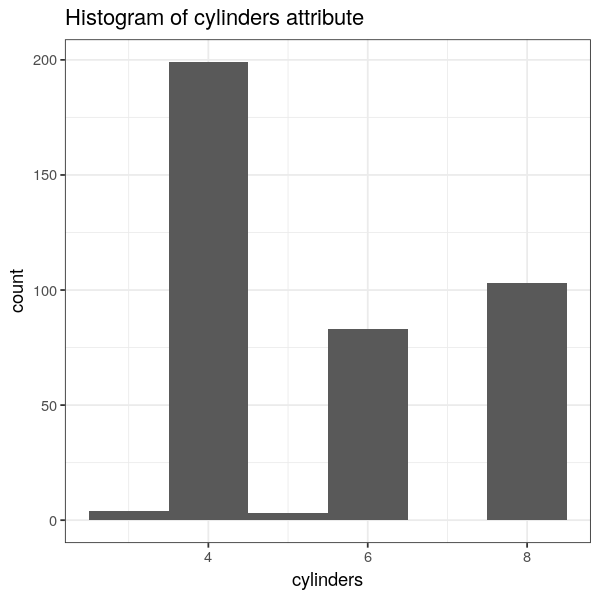

In [31]:
ggplot(auto_mgp, aes(x=auto_mgp$cylinders)) + 
geom_histogram(binwidth = 1) + 
labs(title = "Histogram of cylinders", x="cylinders") + 
theme_bw()

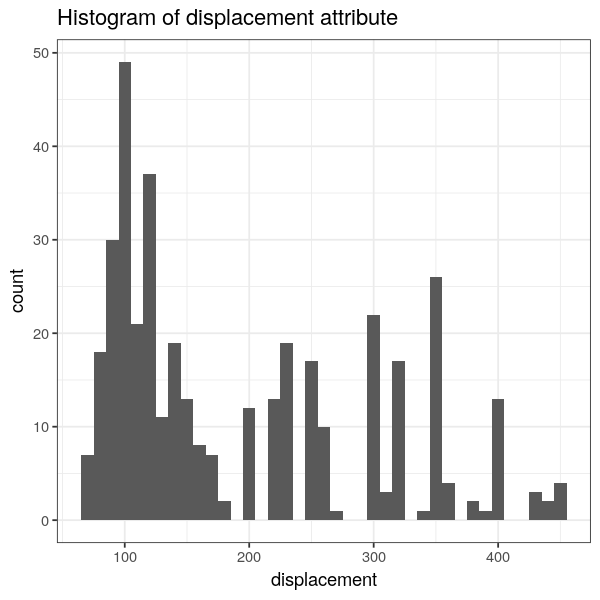

In [34]:
ggplot(auto_mgp, aes(x=auto_mgp$displacement)) + 
geom_histogram(binwidth = 10) + 
labs(title = "Histogram of displacement", x="displacement") + 
theme_bw()

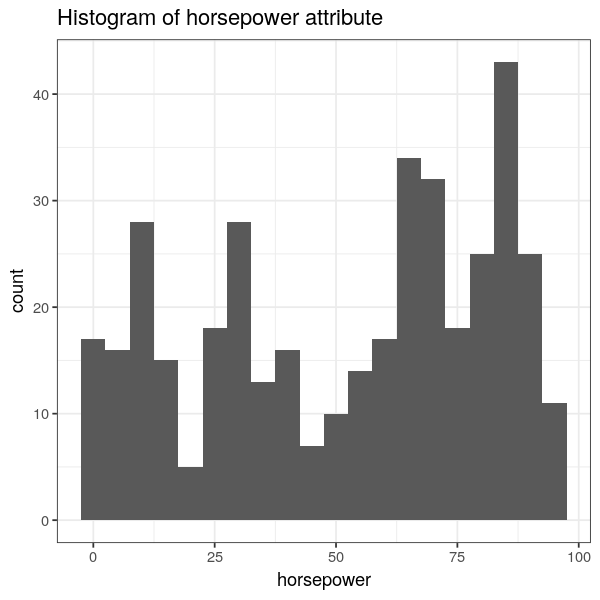

In [37]:
ggplot(auto_mgp, aes(x=auto_mgp$horsepower)) + 
geom_histogram(binwidth = 5) + 
labs(title = "Histogram of horsepower", x="horsepower") + 
theme_bw()

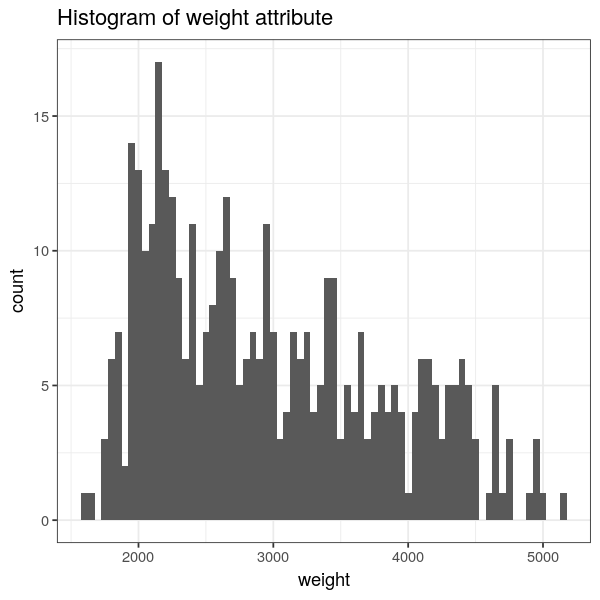

In [39]:
ggplot(auto_mgp, aes(x=auto_mgp$weight)) + 
geom_histogram(binwidth = 50) + 
labs(title = "Histogram of weight", x="weight") + 
theme_bw()

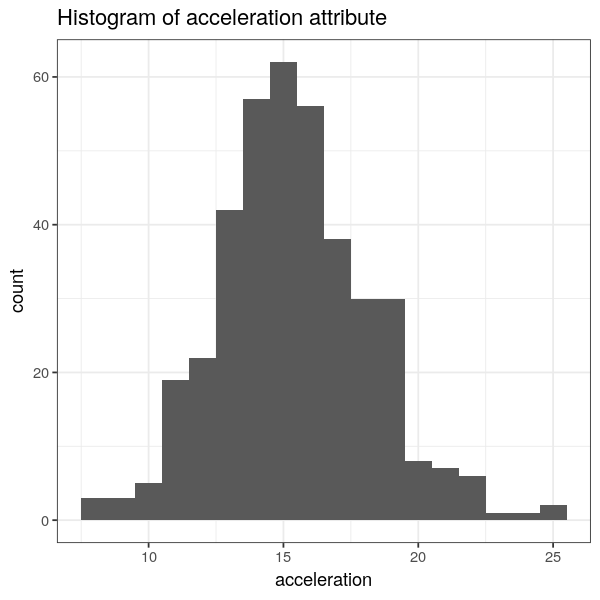

In [40]:
ggplot(auto_mgp, aes(x=auto_mgp$acceleration)) + 
geom_histogram(binwidth = 1) + 
labs(title = "Histogram of acceleration", x="acceleration") + 
theme_bw()

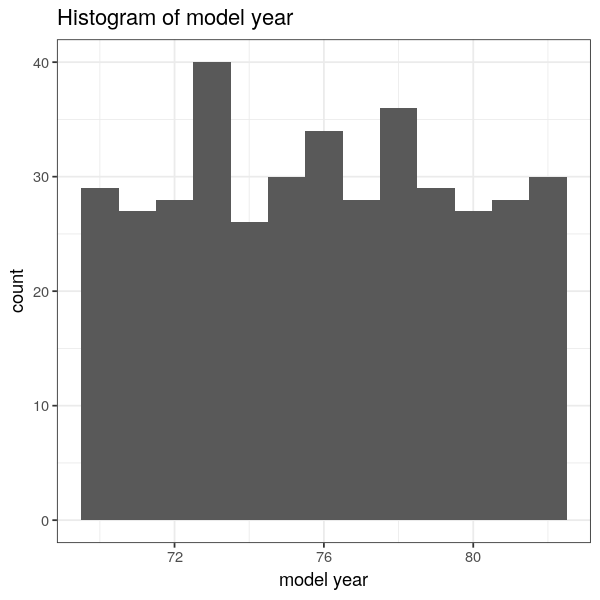

In [41]:
ggplot(auto_mgp, aes(x=auto_mgp$model_year)) + 
geom_histogram(binwidth = 1) + 
labs(title = "Histogram of model year", x="model year") + 
theme_bw()

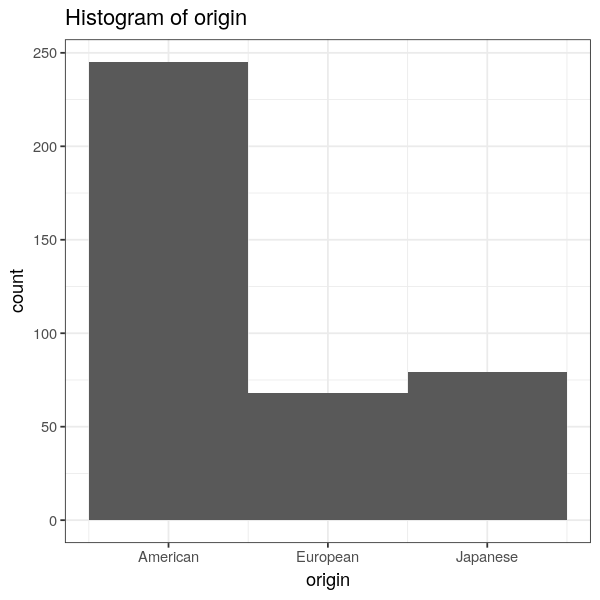

In [49]:
ggplot(auto_mgp, aes(x=auto_mgp$origin)) + 
geom_histogram(binwidth = 1) + 
labs(title = "Histogram of origin", x="origin") + 
theme_bw() +
scale_x_continuous(breaks = (1:3), labels = c("American","European", "Japanese"))

### Correlation between variables

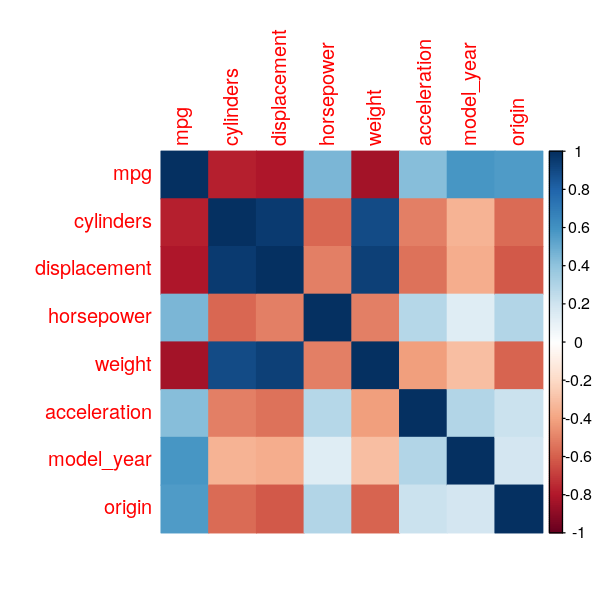

In [15]:
correlations = cor(select(auto_mgp, mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, 
                          origin))
corrplot(correlations, method = "color")


In the figure above on the one hand, we can see that cylinder and displacement, cylinder and weight, displacement and weight has a strong positive correlation (when one increase, the other increase too). On the other hand, we can see cylinder and mgp, displacement and mgp, mgp and weight has a very strong negative correlation (when one increase, the other decrease).

Under this assumptions, we think that:
* Cylinder and displacement are correlated by meaning (if the car has more cylinder, the value of displacement will be higher.


* Cylinder and weight: are correlated since cars with a higher number of cilinders was perhaps more weighed (SUV cars have higher number of cylinders than hatchback cars).


* MGP and cylinders or displacement are correlated due to when the number of cylinders increase, the miles per gallon decrease, since cars with a higher number of cylinders tend to consume more fuel.